# Import packages

In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import seaborn as sns

# Show plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

# Set maximum number of columns to be displayed
pd.set_option('display.max_columns', 100)

In [2]:
PICKLE_TRAIN_DIR = os.path.join("..", "processed_data", "train_data.pkl")
PICKLE_HISTORY_DIR = os.path.join("..", "processed_data", "hist_data.pkl")

In [3]:
hist_data = pd.read_pickle(PICKLE_HISTORY_DIR)
hist_data.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,0.0


In [4]:
data = pd.read_pickle(PICKLE_TRAIN_DIR)
data.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


# Features Engineering

Since we have the consumption data for each of the companies for the year 2015, we will create new features using the average of the year, the
last six months, and the last three months to our model.


In [5]:
mean_year = hist_data.groupby(["id"]).mean().reset_index()

In [6]:
mean_6m = hist_data[hist_data["price_date"] > "2015-06-01"].groupby(["id"]).mean().reset_index()

In [7]:
mean_3m = hist_data[hist_data["price_date"] > "2015-10-01"].groupby(["id"]).mean().reset_index()

In [8]:
### Combine them in a single dataframe
mean_year = mean_year.rename(index=str, columns={"price_p1_var": "mean_year_price_p1_var",
                                                 "price_p2_var": "mean_year_price_p2_var",
                                                 "price_p3_var": "mean_year_price_p3_var",
                                                 "price_p1_fix": "mean_year_price_p1_fix",
                                                 "price_p2_fix": "mean_year_price_p2_fix",
                                                 "price_p3_fix": "mean_year_price_p3_fix",})
mean_year["mean_year_price_p1"] = mean_year["mean_year_price_p1_var"] + mean_year["mean_year_price_p1_fix"]
mean_year["mean_year_price_p2"] = mean_year["mean_year_price_p2_var"] + mean_year["mean_year_price_p2_fix"]
mean_year["mean_year_price_p3"] = mean_year["mean_year_price_p3_var"] + mean_year["mean_year_price_p3_fix"]

In [9]:
mean_6m = mean_6m.rename(index=str, columns={"price_p1_var": "mean_6m_price_p1_var",
                                             "price_p2_var": "mean_6m_price_p2_var",
                                             "price_p3_var": "mean_6m_price_p3_var",
                                             "price_p1_fix": "mean_6m_price_p1_fix",
                                             "price_p2_fix": "mean_6m_price_p2_fix",
                                             "price_p3_fix": "mean_6m_price_p3_fix",})
mean_6m["mean_6m_price_p1"] = mean_6m["mean_6m_price_p1_var"] + mean_6m["mean_6m_price_p1_fix"]
mean_6m["mean_6m_price_p2"] = mean_6m["mean_6m_price_p2_var"] + mean_6m["mean_6m_price_p2_fix"]
mean_6m["mean_6m_price_p3"] = mean_6m["mean_6m_price_p3_var"] + mean_6m["mean_6m_price_p3_fix"]


In [10]:
mean_3m = mean_3m.rename(index=str, columns={"price_p1_var": "mean_3m_price_p1_var",
                                             "price_p2_var": "mean_3m_price_p2_var",
                                             "price_p3_var": "mean_3m_price_p3_var",
                                             "price_p1_fix": "mean_3m_price_p1_fix",
                                             "price_p2_fix": "mean_3m_price_p2_fix",
                                             "price_p3_fix": "mean_3m_price_p3_fix",})
mean_3m["mean_3m_price_p1"] = mean_3m["mean_3m_price_p1_var"] + mean_3m["mean_3m_price_p1_fix"]
mean_3m["mean_3m_price_p2"] = mean_3m["mean_3m_price_p2_var"] + mean_3m["mean_3m_price_p2_fix"]
mean_3m["mean_3m_price_p3"] = mean_3m["mean_3m_price_p3_var"] + mean_3m["mean_3m_price_p3_fix"]

Now we will merge them into a single dataframe


In [11]:
#features = pd.merge(mean_year,mean_6m, on="id")
#features = pd.merge(features,mean_3m, on="id")

hist_data = mean_year

## =- Feature Engineering

We explored the data and made a deep dive into the churn by dates. Nonetheless, that exploration was quite shallow and did
not provide us with any relevant insight.
What if we could create a new variable that could provide us more relevant insights?

In [12]:
data["tenure"] = ((data["date_end"] - data["date_activ"])/ np.timedelta64(1, "Y")).astype(int)
tenure = data[["tenure", "churn", "id"]].groupby(["tenure", "churn"])["id"].count().unstack(level=1)
tenure_percentage = (tenure.div(tenure.sum(axis=1), axis=0)*100)

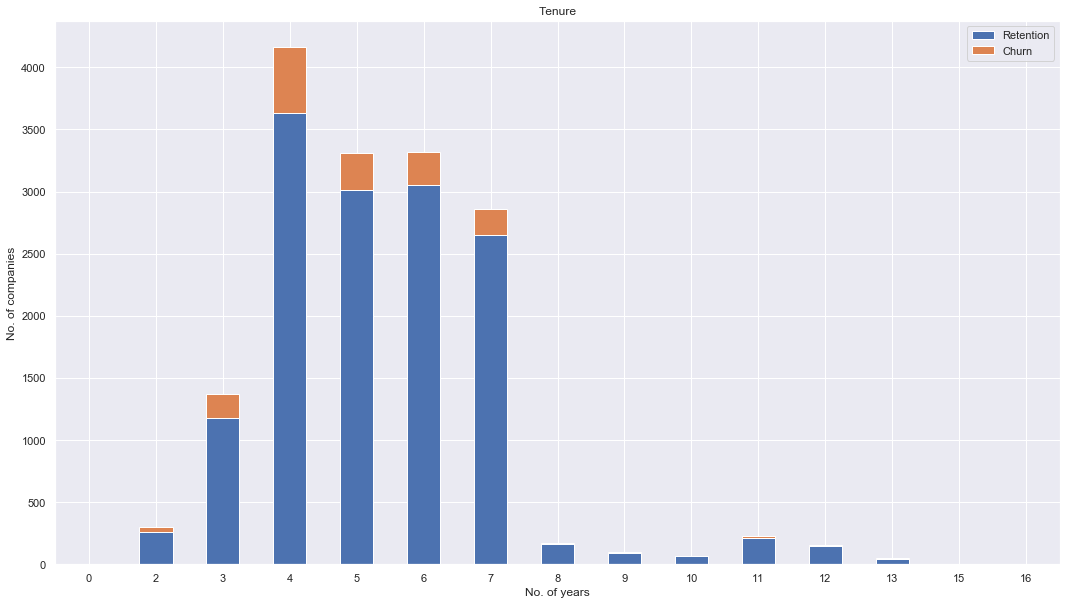

In [13]:
tenure.plot(kind="bar",
            figsize=(18,10),
            stacked=True,
            rot=0,
            title= "Tenure")

# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of companies")
plt.xlabel("No. of years")
plt.show()

Churn is very low for companies which joined recently or that have made the contract a long time ago. With the higher number of
churners within the 3-7 years of tenure.

We will also transform the dates provided in such a way that we can make more sense out of those.

                months_activ : Number of months active until reference date (Jan 2016)

                months_to_end : Number of months of the contract left at reference date (Jan 2016)

                months_modif_prod : Number of months since last modification at reference date (Jan 2016)

                months_renewal : Number of months since last renewal at reference date (Jan 2016)

In [14]:
def convert_months(reference_date, dataframe, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = REFERENCE_DATE - dataframe[column]
    months = (time_delta / np.timedelta64(1, "M")).astype(int)
    return months

In [15]:
# Create reference date as provided on the exercise statement
REFERENCE_DATE = datetime.datetime(2016,1,1)

data["months_activ"] = convert_months(REFERENCE_DATE, data, "date_activ")
data["months_to_end"] = -convert_months(REFERENCE_DATE, data, "date_end")
data["months_modif_prod"] = convert_months(REFERENCE_DATE, data, "date_modif_prod")
data["months_renewal"] = convert_months(REFERENCE_DATE, data, "date_renewal")


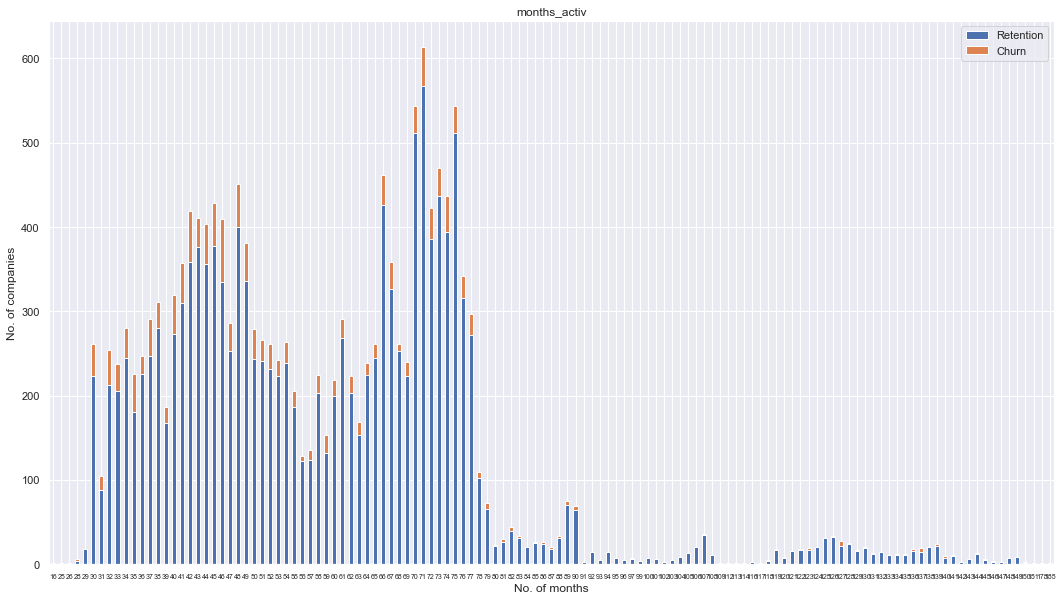

In [16]:
def plot_churn_by_month(dataframe, column, fontsize_=11):
    """
    Plot churn distribution by monthly variable
    """
    temp = dataframe[[column, "churn", "id"]].groupby([column, "churn"])["id"].count().unstack(level=1)
    temp.plot(kind="bar",
              figsize=(18,10),
              stacked=True,
              rot=0,title= column)
    
    # Rename legend
    plt.legend(["Retention", "Churn"], loc="upper right")
    # Labels
    plt.ylabel("No. of companies")
    plt.xlabel("No. of months")
    # Set xlabel fontsize
    plt.xticks(fontsize=fontsize_)
    plt.show()

plot_churn_by_month(data, "months_activ", 7)

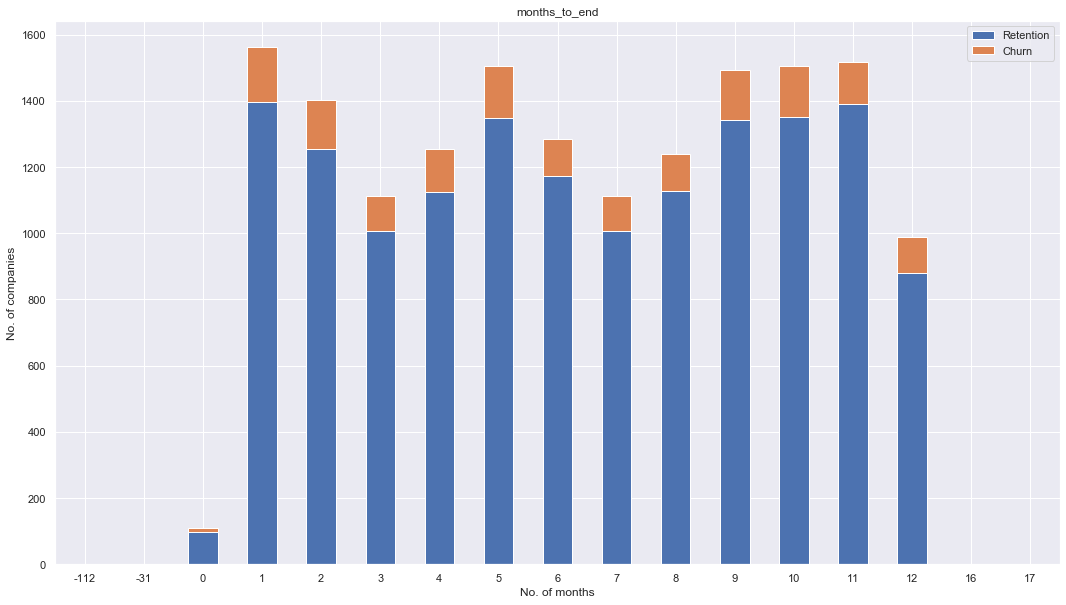

In [17]:
plot_churn_by_month(data,  "months_to_end")

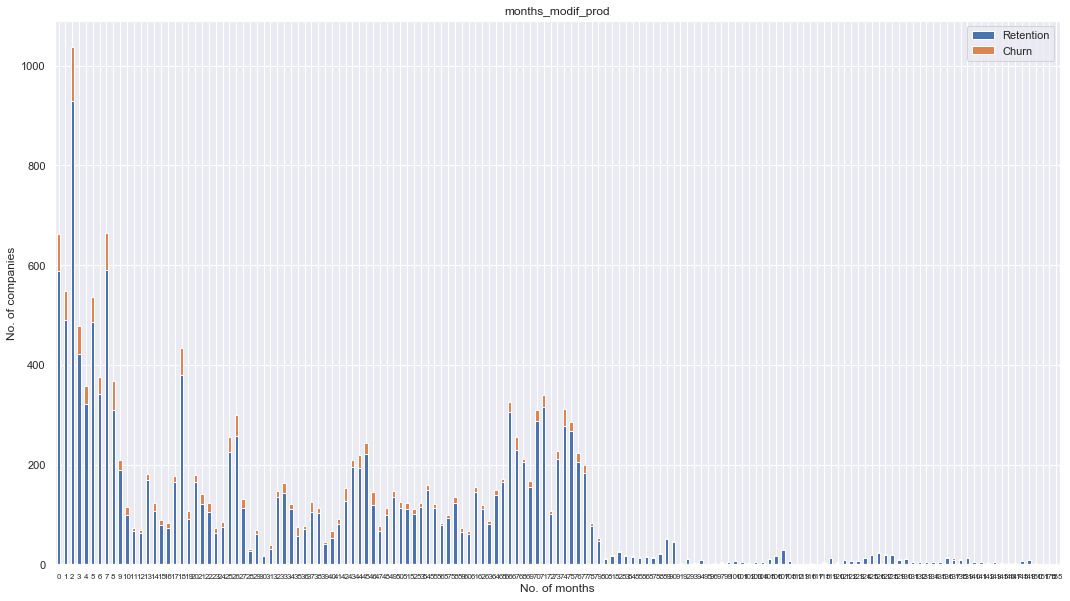

In [18]:
plot_churn_by_month(data, "months_modif_prod", 8)

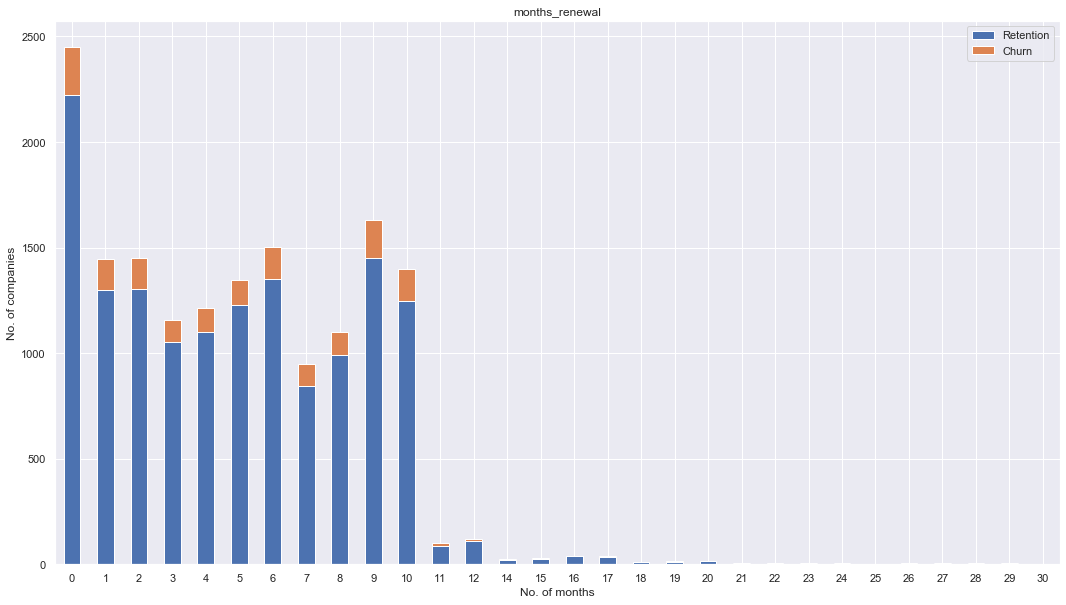

In [19]:
plot_churn_by_month(data, "months_renewal")

In [20]:
data.drop(columns=["date_activ", "date_end", "date_modif_prod", "date_renewal"],inplace=True)

### Transforming boolean data

For the column has_gas, we will replace t for True or 1 and f for False or 0 .

In [21]:
data["has_gas"]=data["has_gas"].replace(["t", "f"],[1,0])

### Prep Categorical Features

the dataset contain multiple features with different data types, most of the columns 'float' type data, some are in 'int' formate while others in 'categorical or alphanumeric' formate. We will convert them so the model learn from them.

#### =- Categorical data channel_sales

First of all let's replace the Nan values with a string called null_values_channel

In [22]:
data["channel_sales"] = data["channel_sales"].fillna("null_values_channel")

Now transform the channel_sales column into categorical data type

In [23]:
# Transform to categorical data type
data["channel_sales"] = data["channel_sales"].astype("category")

We want to see how many categories we will end up with

In [24]:
pd.DataFrame({"Samples in category": data["channel_sales"].value_counts()})

,Samples in category
foosdfpfkusacimwkcsosbicdxkicaua,7377
null_values_channel,4218
lmkebamcaaclubfxadlmueccxoimlema,2073
usilxuppasemubllopkaafesmlibmsdf,1444
ewpakwlliwisiwduibdlfmalxowmwpci,966
sddiedcslfslkckwlfkdpoeeailfpeds,12
epumfxlbckeskwekxbiuasklxalciiuu,4
fixdbufsefwooaasfcxdxadsiekoceaa,2


So that means we will create 7 different dummy variables . Each variable will become a different column

In [25]:
# Create dummy variables
categories_channel = pd.get_dummies(data["channel_sales"], prefix = "channel")

# Rename columns for simplicity
categories_channel.columns = [col_name[:11] for col_name in categories_channel.columns]
categories_channel.head(5)

,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_nul,channel_sdd,channel_usi
0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0


Multicollinearity can affect our models so we will remove one of the columns.

In [26]:
categories_channel.drop(columns=["channel_nul"],inplace=True)

#### =- Categorical data origin_up

First of all let's replace the Nan values with a string called null_values_origin

In [27]:
data["origin_up"] = data["origin_up"].fillna("null_values_origin")

Now transform the origin_up column into categorical data type

In [28]:
data["origin_up"] = data["origin_up"].astype("category")

We want to see how many categories we will end up with

In [29]:
pd.DataFrame({"Samples in category": data["origin_up"].value_counts()})

,Samples in category
lxidpiddsbxsbosboudacockeimpuepw,7825
kamkkxfxxuwbdslkwifmmcsiusiuosws,4517
ldkssxwpmemidmecebumciepifcamkci,3664
null_values_origin,87
usapbepcfoloekilkwsdiboslwaxobdp,2
ewxeelcelemmiwuafmddpobolfuxioce,1


So that means we will create 6 different dummy variables . Each variable will become a different column

In [30]:
# Create dummy variables
categories_origin = pd.get_dummies(data["origin_up"], prefix = "origin")

# Rename columns for simplicity
categories_origin.columns = [col_name[:10] for col_name in categories_origin.columns]
categories_origin

,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_nul,origin_usa
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
16091,0,0,0,1,0,0
16092,0,0,0,1,0,0
16093,0,0,0,1,0,0
16094,0,0,0,1,0,0


Finally remove one column to avoid the dummy variable trap

In [31]:
categories_origin.drop(columns=["origin_nul"],inplace=True)

#### =- Categorical data activity_new

First of all let's replace the Nan values with a string called null_values_activity

In [32]:
data["activity_new"] = data["activity_new"].fillna("null_values_activity")

We want to see how many categories we will end up with

In [33]:
categories_activity = pd.DataFrame({"Activity samples":data["activity_new"].value_counts()})
categories_activity

,Activity samples
null_values_activity,9545
apdekpcbwosbxepsfxclislboipuxpop,1577
kkklcdamwfafdcfwofuscwfwadblfmce,422
kwuslieomapmswolewpobpplkaooaaew,230
fmwdwsxillemwbbwelxsampiuwwpcdcb,219
...,...
kkkmlicifclosfkbxodcmsaweebkolde,1
kcioolmpmuxpoeuicskiafwcmadeflfc,1
akakmkfwoesfipbpaodfippfklpkuxdd,1
bilukaxxaslukscimbduakwseilcxupx,1


As we can see, there are too many categories with very few number of samples. So we will replace any category with less than 75 samples as
null_values_category

In [34]:
#Get the categories with less than 75 samples
to_replace = list(categories_activity[categories_activity["Activity samples"] <= 75].index)
# Replace them with `null_values_categories`
data["activity_new"]=data["activity_new"].replace(to_replace,"null_values_activity")

In [35]:
# Create dummy variables
categories_activity = pd.get_dummies(data["activity_new"], prefix = "activity")

# Rename columns for simplicity
categories_activity.columns = [col_name[:12] for col_name in categories_activity.columns]
categories_activity.head(5)

,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_nul,activity_sfi,activity_wxe
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


Finally remove one column to avoid the dummy variable trap

In [36]:
categories_activity.drop(columns=["activity_nul"],inplace=True)

Merge dummy variables to main dataframe.

We will merge all the new categories into our main dataframe and remove the old categorical columns

In [37]:
# Use common index to merge
data = pd.merge(data, categories_channel, left_index=True, right_index=True)
data = pd.merge(data, categories_origin, left_index=True, right_index=True)
data = pd.merge(data, categories_activity, left_index=True, right_index=True)

data.drop(columns=["channel_sales", "origin_up", "activity_new"], inplace=True)

##  Skewness: log Transformation

In [38]:
print(data.skew())

cons_12m                      6.038959
cons_gas_12m                  9.526390
cons_last_month              14.764644
forecast_cons_12m             6.973885
forecast_cons_year           11.367461
forecast_discount_energy      5.123612
forecast_meter_rent_12m       3.483736
forecast_price_energy_p1      0.225763
forecast_price_energy_p2     -0.124513
forecast_price_pow_p1        -2.532992
has_gas                       1.629939
imp_cons                      9.654239
margin_gross_pow_ele          1.049001
margin_net_pow_ele           -3.126691
nb_prod_act                  16.817252
net_margin                   21.323384
num_years_antig               1.441359
pow_max                       6.942486
churn                         2.683816
tenure                        1.183238
months_activ                  1.375741
months_to_end                -2.241283
months_modif_prod             0.657907
months_renewal                0.793908
channel_epu                  63.417267
channel_ewp              

In [44]:
data.head(5874)

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_sfi,activity_wxe
0,48ada52261e7cf58715202705a0451c9,309275.0,0.0,10025.0,26520.30,10025.0,0.0,359.29,0.095919,0.088347,58.995952,0,831.80,-41.76,-41.76,1,1732.36,3,180.000,0,3,37,10,37,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,24011ae4ebbe3035111d65fa7c15bc57,0.0,54946.0,0.0,0.00,0.0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,43.648,1,3,30,5,2,6,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,d29c2c54acc38ff3c0614d0a653813dd,4660.0,0.0,0.0,189.95,0.0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,13.800,0,7,76,7,76,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,764c75f661154dac3a6c254cd082ea7d,544.0,0.0,0.0,47.96,0.0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,13.856,0,6,68,3,68,8,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,bba03439a292a1e166f80264c16191cb,1584.0,0.0,0.0,240.04,0.0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,13.200,0,6,69,2,69,9,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,ff232ea90c874c735d047a9d778a8be3,42695.0,0.0,3230.0,4489.25,3230.0,0.0,129.61,0.115174,0.098837,40.606701,0,327.53,23.99,23.99,1,492.34,6,50.000,0,7,75,8,18,3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5870,f1ba7ff8106593a27d8450c93961580d,8728.0,0.0,1856.0,849.43,1856.0,0.0,16.70,0.161747,0.084490,44.311378,0,169.99,8.98,8.98,1,77.44,6,10.392,1,6,75,8,5,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5871,13bff2409263c144210e209d1dc16e90,297073.0,168005.0,16963.0,1862.12,219.0,0.0,63.75,0.145711,0.000000,44.311378,1,32.32,27.14,27.14,2,168.10,6,13.200,0,6,69,2,69,9,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
5872,ca12873167a991fd8a892c0a9f2b025c,3842.0,0.0,0.0,577.47,0.0,0.0,6.90,0.141666,0.000000,44.311378,0,0.00,14.53,14.53,1,45.27,5,15.000,0,6,63,8,5,3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [40]:
data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_sfi,activity_wxe
count,1.609600e+04,1.609600e+04,1.609600e+04,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,1.948044e+05,3.191164e+04,1.946154e+04,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,0.184145,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093,5.329958,58.929858,6.376615,35.741240,4.924640,0.000249,0.060015,0.000124,0.458313,0.128790,0.000746,0.089712,0.000062,0.280629,0.227634,0.486146,0.000124,0.097975,0.011742,0.007393,0.007580,0.013606,0.026218,0.014289,0.005157,0.007393
std,6.795151e+05,1.775885e+05,8.235676e+04,4035.085664,5257.364759,5.140728,79.023251,0.026149,0.048427,5.191810,0.387615,494.366979,23.691309,27.906072,1.459808,366.571095,1.676101,21.770392,0.298796,1.749248,20.125024,3.633479,30.609746,3.812127,0.015763,0.237522,0.011147,0.498275,0.334978,0.027295,0.285777,0.007882,0.449320,0.419318,0.499824,0.011147,0.297290,0.107726,0.085668,0.086733,0.115852,0.159787,0.118684,0.071626,0.085668
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,0.000000,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000,0.000000,16.000000,-112.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.906250e+03,0.000000e+00,0.000000e+00,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,0.000000,12.025000,11.950000,1.000000,52.017500,4.000000,12.500000,0.000000,4.000000,44.000000,3.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.533250e+04,0.000000e+00,9.010000e+02,1179.160000,378.000000,0.000000,19.440000,0.142881,0.085917,44.311378,0.000000,44.465000,21.090000,21.000000,1.000000,119.900000,5.000000,13.856000,0.000000,5.000000,57.000000,6.000000,29.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.022150e+04,0.000000e+00,4.127000e+03,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,0.000000,218.090000,29.640000,29.640000,1.000000,275.735000,6.000000,19.800000,0.000000,6.000000,71.000000,9.000000,64.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.609711e+07,4.188440e+06,4.538720e+06,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,1.000000,15042.790000

'cons_gas_12m', 'forecast_cons_12m', 'forecast_cons_year', 'nb_prod_act', 'nett_margin' and others have high value for skewness that mean the data are rightly-sewed distributed.

In [41]:
# Remove negative values
data.loc[data.cons_12m < 0,"cons_12m"] = np.nan
data.loc[data.cons_gas_12m < 0,"cons_gas_12m"] = np.nan
data.loc[data.cons_last_month < 0,"cons_last_month"] = np.nan
data.loc[data.forecast_cons_12m < 0,"forecast_cons_12m"] = np.nan
data.loc[data.forecast_cons_year < 0,"forecast_cons_year"] = np.nan
data.loc[data.forecast_meter_rent_12m < 0,"forecast_meter_rent_12m"] = np.nan
data.loc[data.imp_cons < 0,"imp_cons"] = np.nan
data.loc[data.imp_cons < 0,"net_margin"] = np.nan

To treat outliers there are several techniques for this, and we will discuss the most widely used ones below.
There are several methods in which we can reduce skewness such as square root , cube root , and log . In this case, we will use a log
transformation which is usually recommended for right skewed data.

In [41]:
# Apply log10 transformation
data["cons_12m"] = np.log10(data["cons_12m"]+1)
data["cons_gas_12m"] = np.log10(data["cons_gas_12m"]+1)
data["cons_last_month"] = np.log10(data["cons_last_month"]+1)
data["forecast_cons_12m"] = np.log10(data["forecast_cons_12m"]+1)
data["forecast_cons_year"] = np.log10(data["forecast_cons_year"]+1)
data["forecast_meter_rent_12m"] = np.log10(data["forecast_meter_rent_12m"]+1)
data["imp_cons"] = np.log10(data["imp_cons"]+1)
data["nb_prod_act"] = np.log10(data["nb_prod_act"]+1)
data["net_margin"] = np.log10(data["net_margin"]+1)
data["pow_max"] = np.log10(data["pow_max"]+1)
data["forecast_discount_energy"] = np.log10(data["forecast_discount_energy"]+1)

C:\Users\abids\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\abids\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\abids\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\abids\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)

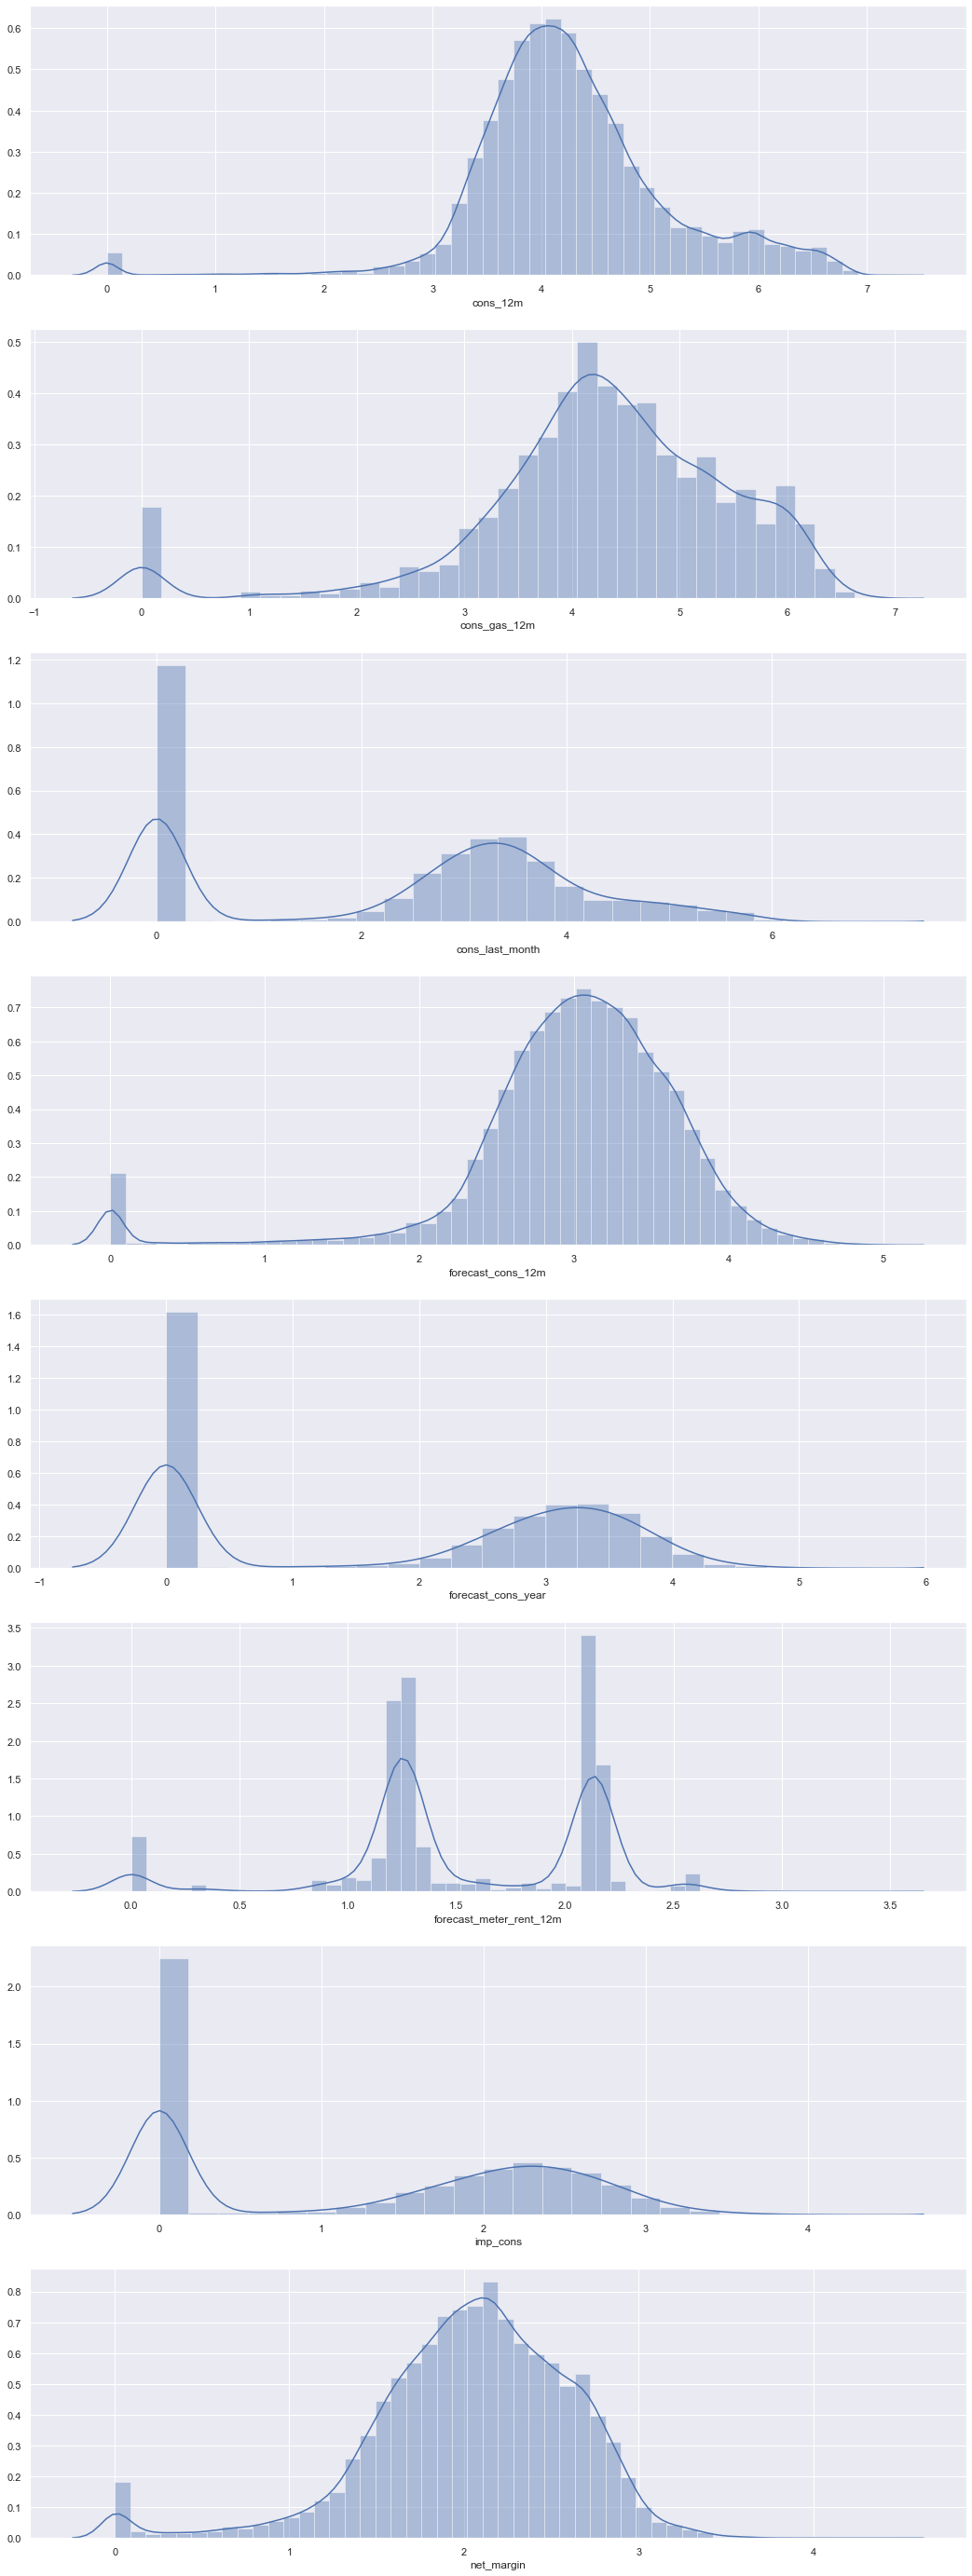

In [42]:
fig, axs = plt.subplots(nrows=8, figsize=(18,50))
# Plot histograms
sns.distplot((data["cons_12m"].dropna()), ax=axs[0])
sns.distplot((data[data["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((data["cons_last_month"].dropna()), ax=axs[2])
sns.distplot((data["forecast_cons_12m"].dropna()), ax=axs[3])
sns.distplot((data["forecast_cons_year"].dropna()), ax=axs[4])
sns.distplot((data["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.distplot((data["imp_cons"].dropna()), ax=axs[6])
sns.distplot((data["net_margin"].dropna()), ax=axs[7])
#sns.distplot((data["nb_prod_act"].dropna()), ax=axs[8])
#sns.distplot((data["pow_max"].dropna()), ax=axs[9])
#sns.distplot((data["orecast_discount_energy"].dropna()), ax=axs[10])

plt.show()

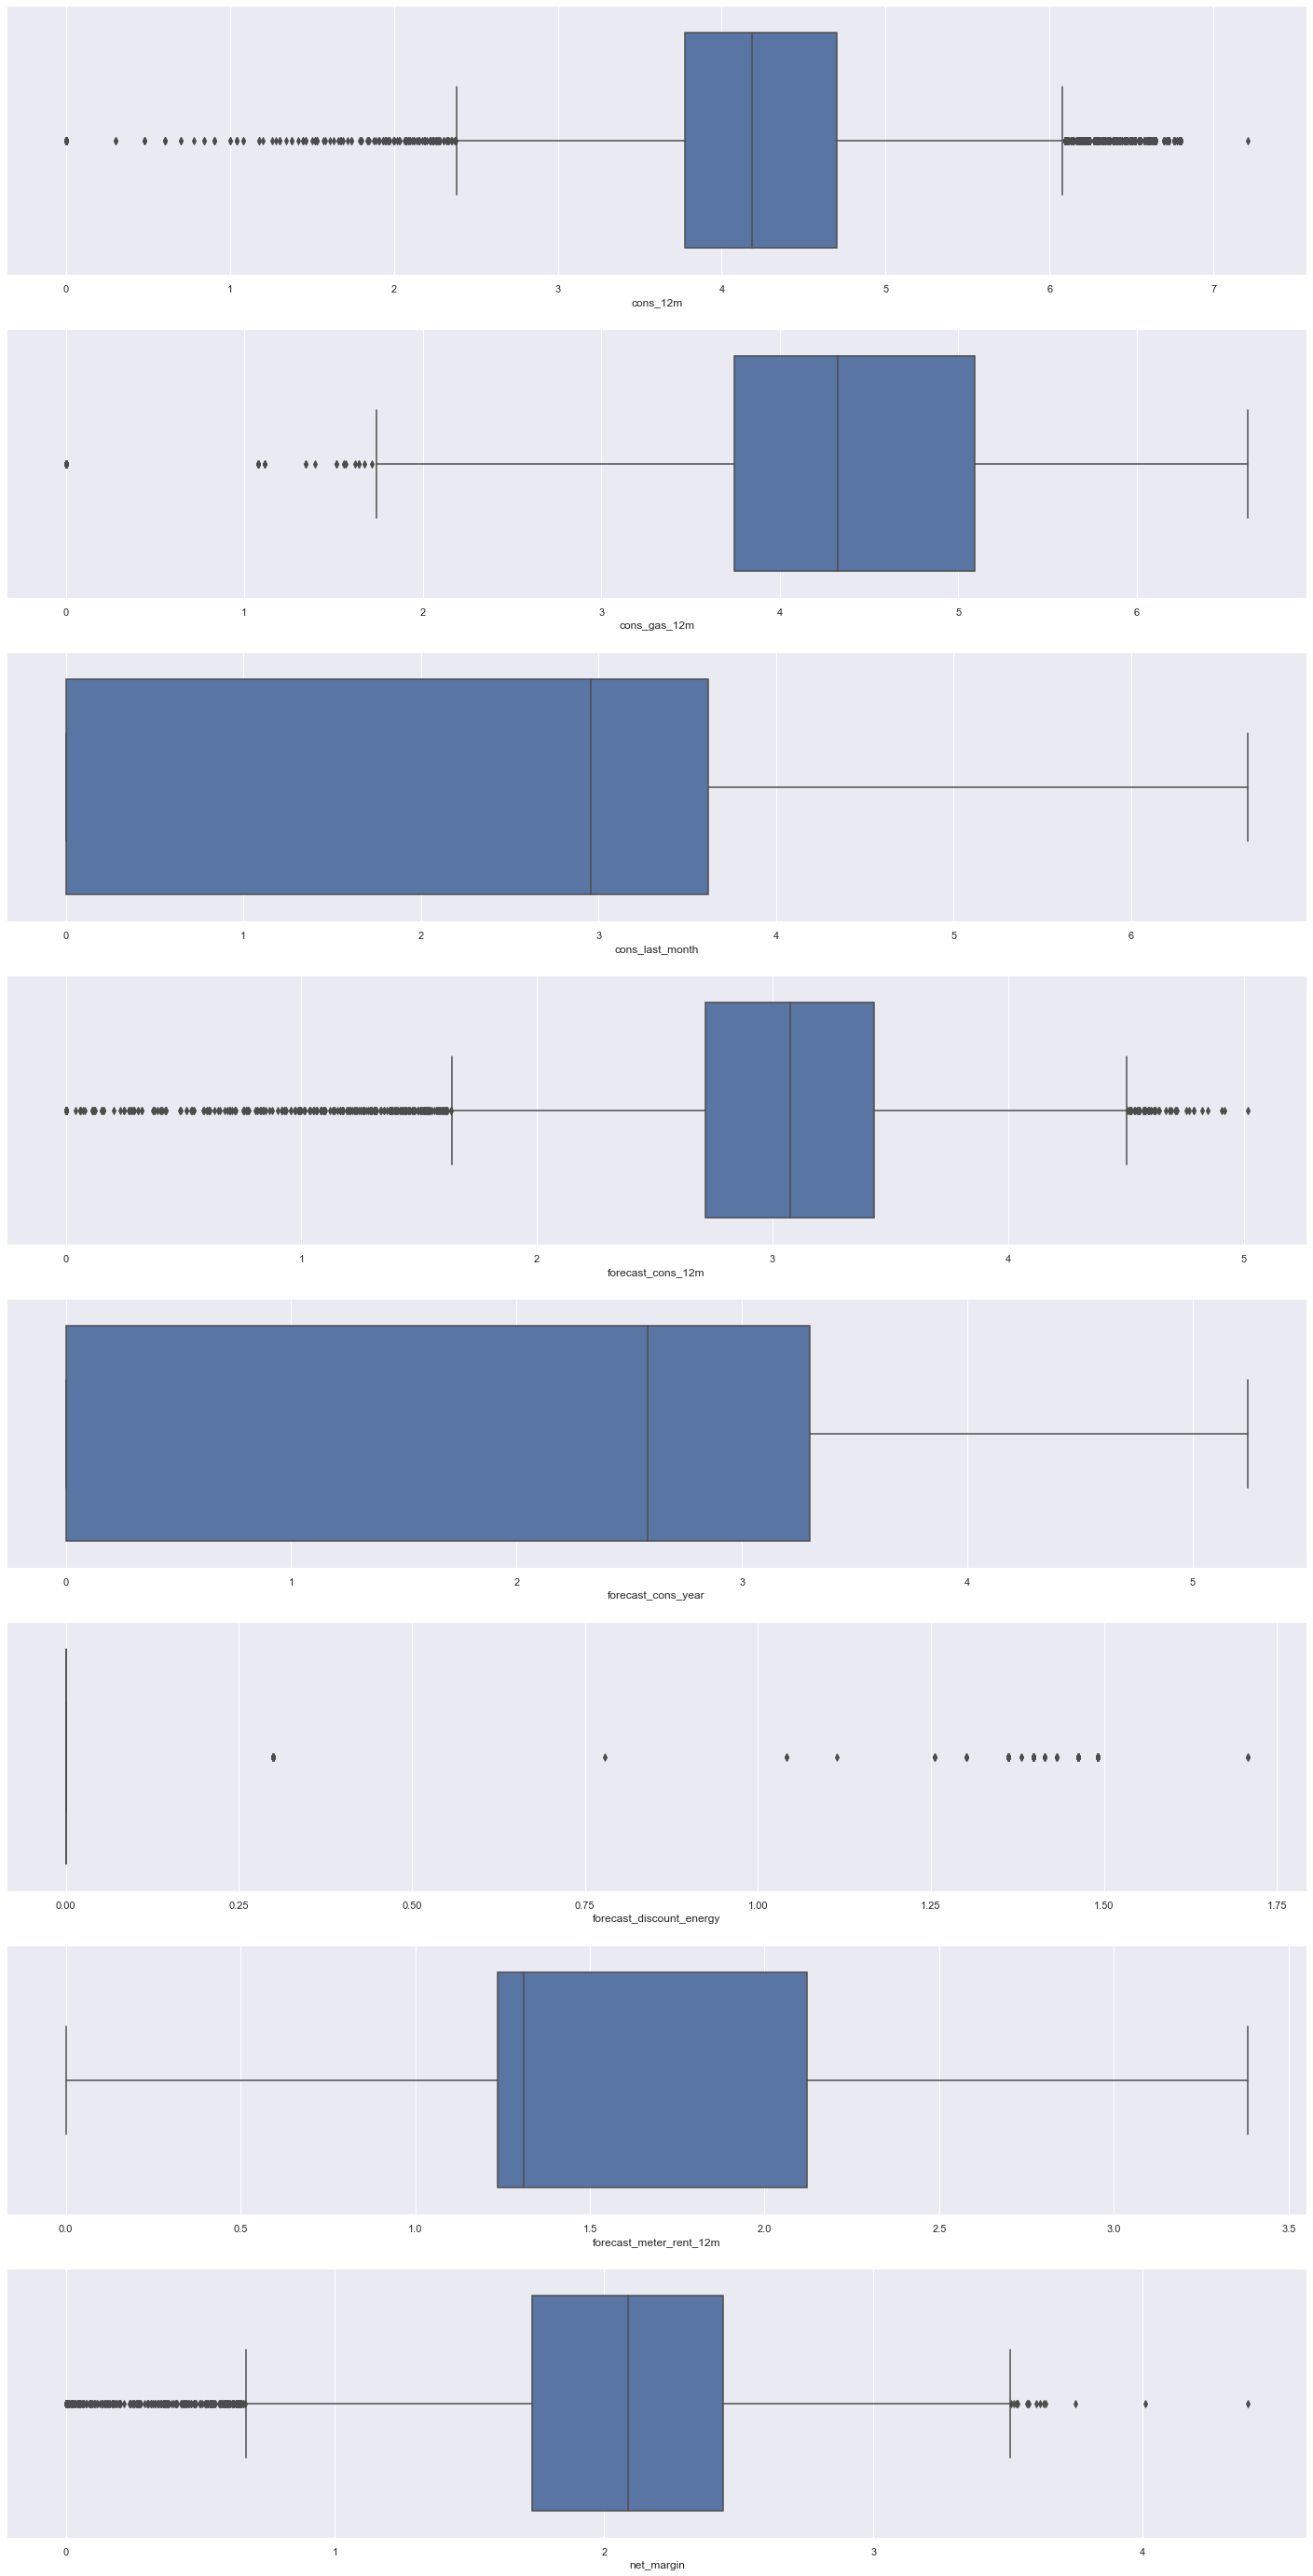

In [43]:
fig, axs = plt.subplots(nrows=8, figsize=(25,50))
# Plot histogram
sns.boxplot((data["cons_12m"].dropna()), ax=axs[0])
sns.boxplot((data[data["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.boxplot((data["cons_last_month"].dropna()), ax=axs[2])
sns.boxplot((data["forecast_cons_12m"].dropna()),ax=axs[3])
sns.boxplot((data["forecast_cons_year"].dropna()), ax=axs[4])
sns.boxplot((data["forecast_discount_energy"].dropna()), ax=axs[5])
sns.boxplot((data["forecast_meter_rent_12m"].dropna()), ax=axs[6])
sns.boxplot(data["net_margin"], ax=axs[7])
# sns.boxplot(data["nb_prod_act"], ax=axs[8])
# sns.boxplot(data["pow_max"], ax=axs[9])
# sns.boxplot(data["imp_cons"], ax=axs[10])

plt.show()

## =- Correlated Features

### Removing Multicolinearity using Correlation Metrix

To remove the correlated features, we can make use of the corr() method of the pandas dataframe. The corr() method returns a correlation matrix containing correlation between all the columns of the dataframe. the correlation magnitude with 0.7 to 0.9 considered as <b>higly correlated</b> whereas between 0.9 to 1.0 to be <b>very higly correlated.</b>

In [44]:
#history ata correlation remove
#an empty set that will contain all the correlated features
hist_correlated_features = set()

# correlation matrix for the columns in the dataset
hist_correlation_matrix = hist_data.corr()

#correltion magnitude between 0.9 to 1.0 would be consider as highly correlated.
for i in range(len(hist_correlation_matrix .columns)):
    for j in range(i):
        if abs(hist_correlation_matrix.iloc[i, j]) > 0.95:
            hist_colname = hist_correlation_matrix.columns[i]
            hist_correlated_features.add(hist_colname)
            
print(hist_correlated_features)

{'mean_year_price_p2', 'mean_year_price_p3', 'mean_year_price_p2_fix', 'mean_year_price_p3_fix', 'mean_year_price_p1'}


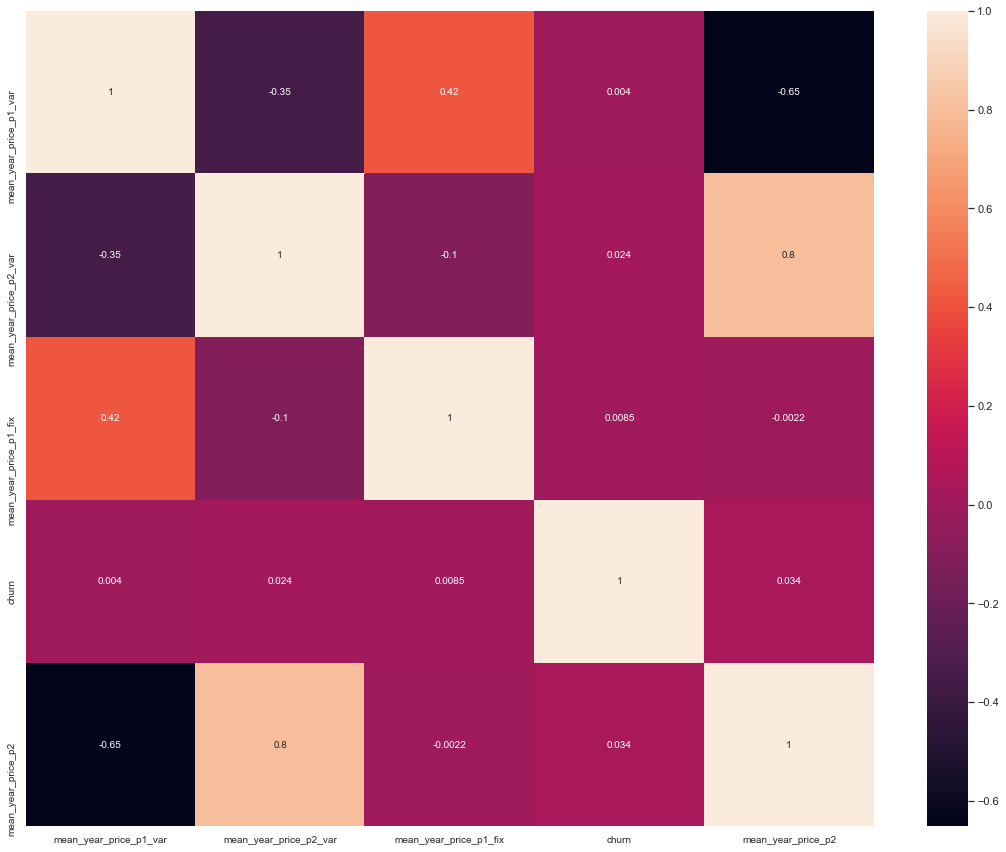

In [51]:
# Calculate correlation of variables
correlation = hist_data.corr()

# Plot correlation
plt.figure(figsize=(19,15))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [50]:
hist_data = hist_data.drop(hist_data[['mean_year_price_p3_fix', 'mean_year_price_p2_fix', 
                                      'mean_year_price_p1', 'mean_year_price_p3', 'mean_year_price_p3_var']], axis=1)
#, 'mean_year_price_p2'


In [52]:
#an empty set that will contain all the correlated features
correlated_features = set()

# correlation matrix for the columns in the dataset
correlation_matrix = data.corr()

#correltion magnitude between 0.9 to 1.0 would be consider as highly correlated.
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
print(correlated_features)

{'tenure', 'imp_cons', 'months_activ', 'has_gas'}


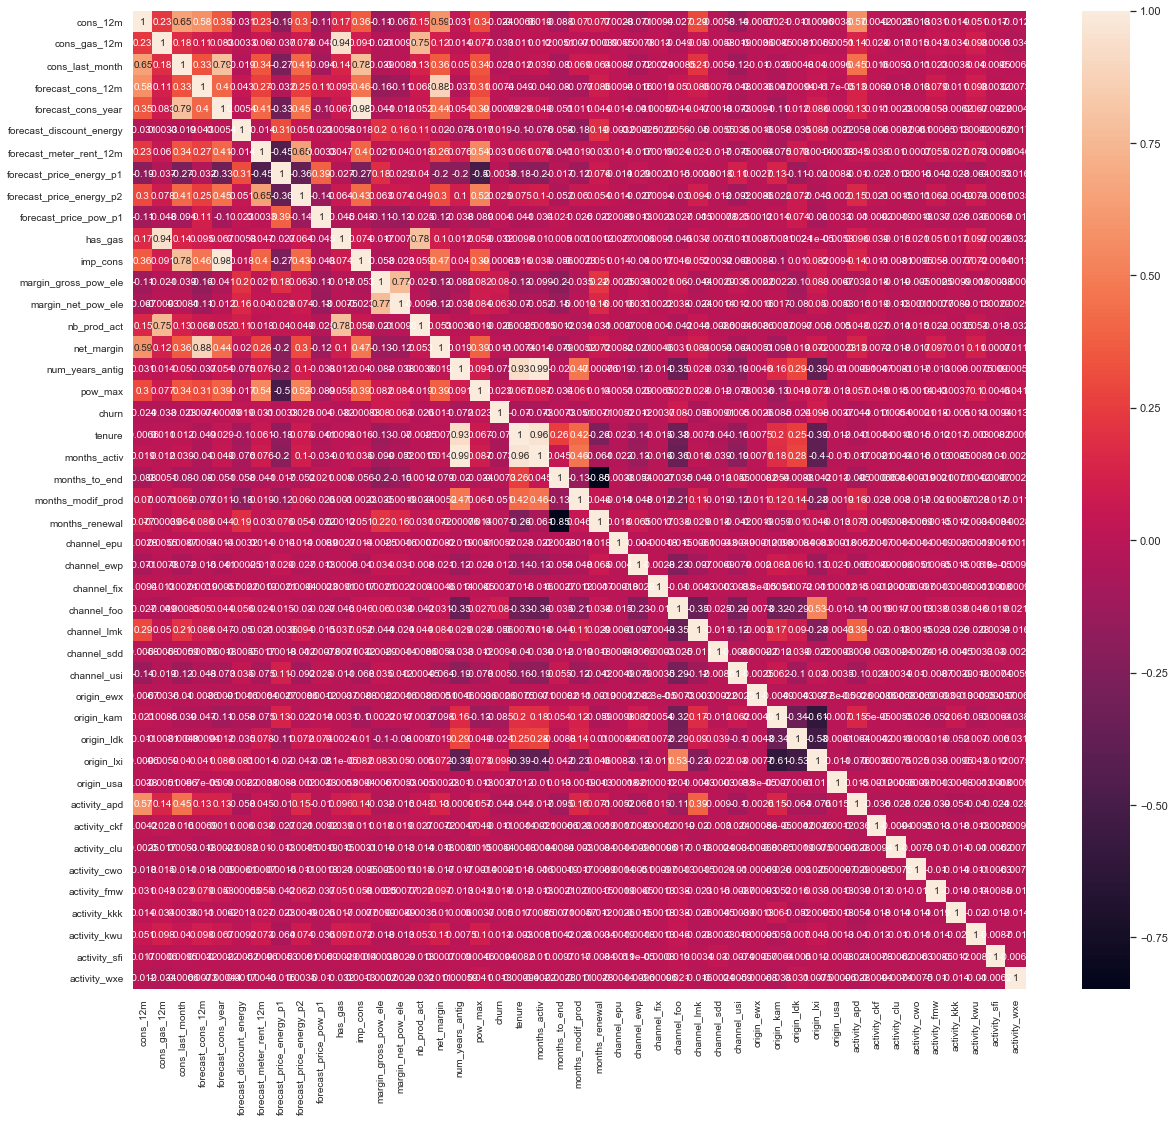

In [53]:
 # Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns.values,
 yticklabels=correlation_matrix.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [54]:
data = data.drop(data[['months_activ', 'num_years_antig', 'forecast_cons_year']], axis=1)

# Removing outliers

Removing outliers from the fetures dataset

In [55]:
def replace_outliers_z_score(dataframe, column, Z=3):
    """
    Replace outliers with the mean values using the Z score.
    Nan values are also replaced with the mean values.
    Parameters
    ----------
    dataframe : pandas dataframe
    Contains the data where the outliers are to be found
    column : str
    Usually a string with the name of the column

    Returns
    -------
    Dataframe
    With outliers under the lower and above the upper bound removed
    """
    from scipy.stats import zscore

    df = dataframe.copy(deep=True)
    df.dropna(inplace=True, subset=[column])

    # Calculate mean without outliers
    df["zscore"] = zscore(df[column])
    mean_ = df[(df["zscore"] > -Z) & (df["zscore"] < Z)][column].mean()

    # Replace with mean values
    dataframe[column] = dataframe[column].fillna(mean_)
    dataframe["zscore"] = zscore(dataframe[column])
    no_outliers = dataframe[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z)].shape[0]
    dataframe.loc[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z),column] = mean_

    # Print message
    print("Replaced:", no_outliers, " outliers in ", column)
    return dataframe.drop(columns="zscore")

In [56]:
for c in hist_data.columns:
    if c != "id":
        hist_data = replace_outliers_z_score(hist_data,c)


Replaced: 276  outliers in  mean_year_price_p1_var
Replaced: 0  outliers in  mean_year_price_p2_var
Replaced: 120  outliers in  mean_year_price_p1_fix
Replaced: 1595  outliers in  churn
Replaced: 0  outliers in  mean_year_price_p2


In [57]:
hist_data.reset_index(drop=True, inplace=True)

Removing outliers from the data 

In [58]:
def _find_outliers_iqr(dataframe, column):
    """
    Find outliers using the 1.5*IQR rule.
    Parameters
    ----------
    dataframe : pandas dataframe
    Contains the data where the outliers are to be found
    column : str
    Usually a string with the name of the column

    Returns
    -------
    Dict
    With the values of the iqr, lower_bound and upper_bound
    """
    col = sorted(dataframe[column])
    q1, q3= np.percentile(col,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr)
    upper_bound = q3 +(1.5 * iqr)
    results = {"iqr": iqr, "lower_bound":lower_bound, "upper_bound":upper_bound}
    return results

def remove_outliers_iqr(dataframe, column):
    """
    Remove outliers using the 1.5*IQR rule.
    Parameters
    ----------
    dataframe : pandas dataframe
    Contains the data where the outliers are to be found
    column : str
    Usually a string with the name of the column

    Returns
    -------
    Dataframe
    With outliers under the lower and above the upper bound removed
    """

    outliers = _find_outliers_iqr(dataframe, column)
    removed = dataframe[(dataframe[column] < outliers["lower_bound"]) |
    (dataframe[column] > outliers["upper_bound"])].shape

    dataframe = dataframe[(dataframe[column] > outliers["lower_bound"]) &
    (dataframe[column] < outliers["upper_bound"])]
    print("Removed:", removed[0], " outliers")
    return dataframe
    
def remove_outliers_z_score(dataframe, column, Z=3):
    """
    Remove outliers using the Z score. Values with more than 3 are removed.
    Parameters
    ----------
    dataframe : pandas dataframe
    Contains the data where the outliers are to be found
    column : str
    Usually a string with the name of the column

    Returns
    -------
    Dataframe
    With outliers under the lower and above the upper bound removed
    """
    from scipy.stats import zscore

    dataframe["zscore"] = zscore(dataframe[column])

    removed = dataframe[(dataframe["zscore"] < -Z) |
    (dataframe["zscore"] > Z)].shape

    dataframe = dataframe[(dataframe["zscore"] > -Z) &
    (dataframe["zscore"] < Z)]

    print("Removed:", removed[0], " outliers of ", column)

    return dataframe.drop(columns="zscore")

def replace_outliers_z_score(dataframe, column, Z=3):
    """
    Replace outliers with the mean values using the Z score.
    Nan values are also replaced with the mean values.
    Parameters
    ----------
    dataframe : pandas dataframe
    Contains the data where the outliers are to be found
    column : str
    Usually a string with the name of the column

    Returns
    -------
    Dataframe
    With outliers under the lower and above the upper bound removed
    """
    from scipy.stats import zscore

    df = dataframe.copy(deep=True)
    df.dropna(inplace=True, subset=[column])

    # Calculate mean without outliers
    df["zscore"] = zscore(df[column])
    mean_ = df[(df["zscore"] > -Z) & (df["zscore"] < Z)][column].mean()

    # Replace with mean values
    no_outliers = dataframe[column].isnull().sum()
    dataframe[column] = dataframe[column].fillna(mean_)
    dataframe["zscore"] = zscore(dataframe[column])
    dataframe.loc[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z),column] = mean_

    # Print message
    print("Replaced:", no_outliers, " outliers in ", column)
    return dataframe.drop(columns="zscore")

In [59]:
data = replace_outliers_z_score(data,"cons_12m")
data = replace_outliers_z_score(data,"cons_gas_12m")
data = replace_outliers_z_score(data,"cons_last_month")
data = replace_outliers_z_score(data,"forecast_cons_12m")
data = replace_outliers_z_score(data,"forecast_discount_energy")
data = replace_outliers_z_score(data,"forecast_meter_rent_12m")
data = replace_outliers_z_score(data,"forecast_price_energy_p1")
data = replace_outliers_z_score(data,"forecast_price_energy_p2")
data = replace_outliers_z_score(data,"forecast_price_pow_p1")
data = replace_outliers_z_score(data,"imp_cons")
data = replace_outliers_z_score(data,"margin_gross_pow_ele")
data = replace_outliers_z_score(data,"margin_net_pow_ele")
data = replace_outliers_z_score(data,"net_margin")
data = replace_outliers_z_score(data,"pow_max")
#data = replace_outliers_z_score(data,"months_activ")
data = replace_outliers_z_score(data,"months_to_end")
data = replace_outliers_z_score(data,"months_modif_prod")
#data = replace_outliers_z_score(data,"months_renewal")

Replaced: 27  outliers in  cons_12m
Replaced: 6  outliers in  cons_gas_12m
Replaced: 46  outliers in  cons_last_month
Replaced: 41  outliers in  forecast_cons_12m
Replaced: 0  outliers in  forecast_discount_energy
Replaced: 4  outliers in  forecast_meter_rent_12m
Replaced: 0  outliers in  forecast_price_energy_p1
Replaced: 0  outliers in  forecast_price_energy_p2
Replaced: 0  outliers in  forecast_price_pow_p1
Replaced: 27  outliers in  imp_cons
Replaced: 0  outliers in  margin_gross_pow_ele
Replaced: 0  outliers in  margin_net_pow_ele
Replaced: 97  outliers in  net_margin
Replaced: 0  outliers in  pow_max
Replaced: 0  outliers in  months_to_end
Replaced: 0  outliers in  months_modif_prod


In [60]:
data.reset_index(drop=True, inplace=True)

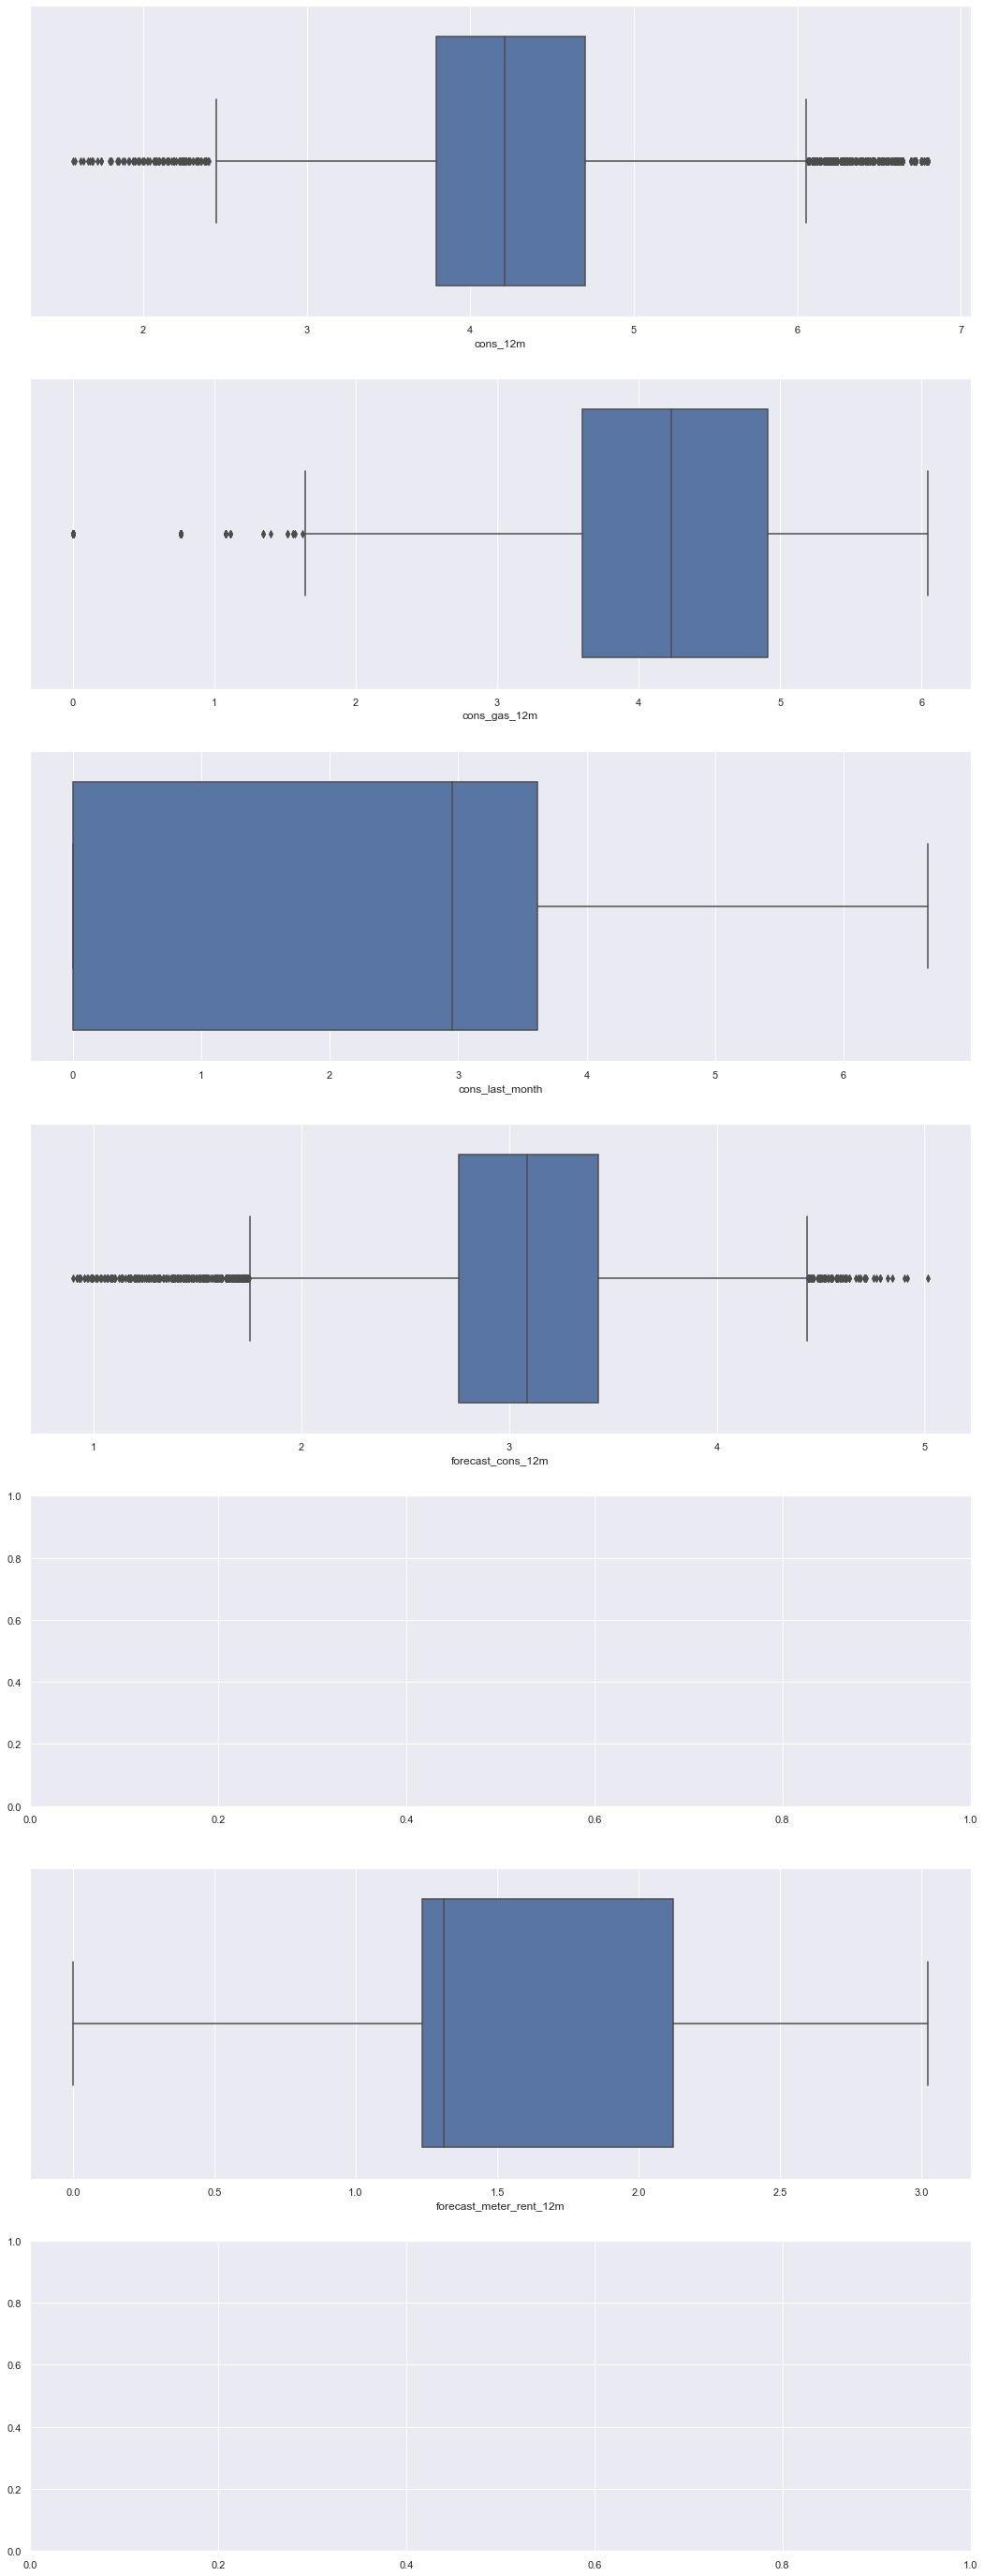

In [61]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot boxplots
sns.boxplot((data["cons_12m"].dropna()), ax=axs[0])
sns.boxplot((data[data["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.boxplot((data["cons_last_month"].dropna()), ax=axs[2])
sns.boxplot((data["forecast_cons_12m"].dropna()), ax=axs[3])
#sns.boxplot((train["forecast_cons_year"].dropna()), ax=axs[4])
sns.boxplot((data["forecast_meter_rent_12m"].dropna()), ax=axs[5])
#sns.boxplot((data["imp_cons"].dropna()), ax=axs[6])
plt.show()

# Pickling

In [62]:
if not os.path.exists(os.path.join("..", "featured_data")):
    os.makedirs(os.path.join("..", "featured_data"))

PICKLE_TRAIN_DIR = os.path.join("..", "featured_data", "train_data.pkl")
PICKLE_HISTORY_DIR = os.path.join("..", "featured_data", "hist_data.pkl")
pd.to_pickle(data, PICKLE_TRAIN_DIR)
pd.to_pickle(hist_data, PICKLE_HISTORY_DIR)